## Preprocessing

In [74]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

from scipy import stats
import numpy as np 
#import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [75]:

application_df.isnull().sum()    # no null values in entire dataframe
application_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [76]:

# store the names of companies in a new dataframe
companies_name_df = application_df[['EIN','NAME']]
companies_name_df.head()

,EIN,NAME
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT


In [77]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE

application_df = application_df.drop(columns = ['EIN','NAME'])
application_df.head(3)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0


In [78]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE

# Generate a name list of categorical variables 
cat_name_list = application_df.dtypes[application_df.dtypes == 'object'].index.tolist()
# check the unique values in each columns for bucketing
application_df[cat_name_list].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [79]:
# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE

APPL_column_Series = application_df['APPLICATION_TYPE'].value_counts()
APPL_column_Series



T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

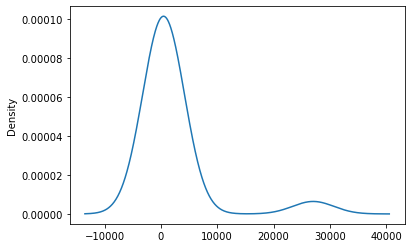

In [80]:

APPL_column_Series.plot.density()

In [81]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
#  YOUR CODE GOES HERE

replace_APPL_list = APPL_column_Series[APPL_column_Series < 200].index.tolist()

# Replace in dataframe
for app in replace_APPL_list:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [82]:
# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE

CLASS_column_Series = application_df['CLASSIFICATION'].value_counts()
CLASS_column_Series

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1820        1
C2150        1
C2600        1
C1245        1
C1732        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [83]:
# You may find it helpful to look at CLASSIFICATION value counts >1
#  YOUR CODE GOES HERE

In [84]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
#  YOUR CODE GOES HERE

replace_CLASS_list = CLASS_column_Series[CLASS_column_Series < 200].index.tolist()

# Replace in dataframe
for cls in replace_CLASS_list:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1197
C7000      777
C1700      287
Name: CLASSIFICATION, dtype: int64

In [85]:
# use oneHot encode method to convert categorcal variables into several numerical variables
enc = OneHotEncoder(sparse = False) # return array not sparse matrix

# create a encode new DataFrame only contains encoded categorical variables
encode_df = pd.DataFrame(enc.fit_transform(application_df[cat_name_list]))

encode_df.columns = enc.get_feature_names(input_features = cat_name_list)

encode_df.head()

C:\Users\cchai\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [86]:
# merge back to orginal df and drop original unencoded columns
encoded_application_df  = application_df.merge(encode_df, left_index = True, right_index = True)\
                                .drop(columns = cat_name_list)
encoded_application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [87]:
# focus on numerical variable: ASK_AMT 
encoded_application_df.ASK_AMT.describe()

count    3.429900e+04
mean     2.769199e+06
std      8.713045e+07
min      5.000000e+03
25%      5.000000e+03
50%      5.000000e+03
75%      7.742000e+03
max      8.597806e+09
Name: ASK_AMT, dtype: float64

<AxesSubplot:>

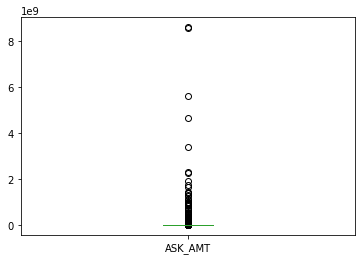

In [88]:

encoded_application_df.ASK_AMT.plot.box()

In [89]:
# According to boxplot, IQR medthod for outliers has huge outliers(8205), it's not good for this case

Q1 = encoded_application_df.ASK_AMT.quantile(0.25)
Q3 = encoded_application_df.ASK_AMT.quantile(0.75)
IQR = Q3 - Q1

boo_ASK = (encoded_application_df.ASK_AMT < (Q1 - 1.5 * IQR)) |(encoded_application_df.ASK_AMT > (Q3 + 1.5 * IQR))
IQR_outliers = encoded_application_df.ASK_AMT[boo_ASK == True]
len(IQR_outliers)

8206

In [90]:

# perform z-score to filter outliers

ASK_AMT_Zscore = np.abs(stats.zscore(application_df.ASK_AMT) <= 3)

outliers = ASK_AMT_Zscore[ASK_AMT_Zscore == False]

len(outliers)

53

In [91]:
#remove 53 outliers from dataframe
encoded_application_df = encoded_application_df[(np.abs(stats.zscore(encoded_application_df.ASK_AMT)) <= 3)]
encoded_application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [92]:
# Convert categorical data to numeric with `pd.get_dummies`
#  YOUR CODE GOES HERE
application_df.ASK_AMT.describe()

# remove 53 outliers from dataframe
#application_df = application_df[(np.abs(stats.zscore(application_df.ASK_AMT)) <= 3)]
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [93]:
encoded_application_df.describe()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
count,34246.000000,3.424600e+04,34246.000000,34246.000000,34246.000000,34246.000000,34246.000000,34246.000000,34246.000000,34246.000000,...,34246.000000,34246.000000,34246.000000,34246.000000,34246.000000,34246.000000,34246.000000,34246.000000,34246.000000,34246.000000
mean,0.999854,6.828438e+05,0.532734,0.007972,0.015418,0.031099,0.788034,0.045027,0.034252,0.035508,...,0.021258,0.015856,0.098522,0.006950,0.027886,0.109414,0.002570,0.005402,0.999212,0.000788
std,0.012082,7.955398e+06,0.498935,0.088929,0.123210,0.173587,0.408707,0.207367,0.181879,0.185062,...,0.144245,0.124920,0.298024,0.083076,0.164650,0.312163,0.050627,0.073301,0.028068,0.028068
min,0.000000,5.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,5.000000e+03,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,5.000000e+03,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,7.246250e+03,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,2.611646e+08,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [97]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE

# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE

y = application_df['IS_SUCCESSFUL'].values

X = application_df.drop(columns = ['IS_SUCCESSFUL']).values

# split into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)


In [98]:
# Create a StandardScaler instances
#scaler = StandardScaler()

# Fit the StandardScaler
#X_scaler = scaler.fit(X_train)

# Scale the data
#X_train_scaled = X_scaler.transform(X_train)
#X_test_scaled = X_scaler.transform(X_test)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

ValueError: could not convert string to float: 'T3'

## Compile, Train and Evaluate the Model

In [23]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

num_input = len(X_train_scaled[0])
num_first = len(X_train_scaled[0])*2
num_second = 50
num_third = 20


nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE

nn_model.add(tf.keras.layers.Dense(units=num_first, input_dim = num_input,
                                    activation ='relu'))

# Second hidden layer
#  YOUR CODE GOES HERE
nn_model.add(tf.keras.layers.Dense(units = num_second, activation='relu'))

# Output layer
#  YOUR CODE GOES HERE
nn_model.add(tf.keras.layers.Dense(units = num_third, activation='relu'))

# Check the structure of the model
nn_model.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

nn_model.summary()

NameError: name 'X_train_scaled' is not defined

In [34]:
# Compile the model
#  YOUR CODE GOES HERE

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [36]:
# Train the model
#  YOUR CODE GOES HERE

Epoch 1/100
25724/25724 [==============================] - 2s 80us/sample - loss: 0.5700 - acc: 0.7234
Epoch 2/100
25724/25724 [==============================] - 1s 44us/sample - loss: 0.5556 - acc: 0.7294
Epoch 3/100
25724/25724 [==============================] - 1s 43us/sample - loss: 0.5529 - acc: 0.7304
Epoch 4/100
25724/25724 [==============================] - 1s 49us/sample - loss: 0.5514 - acc: 0.7318
Epoch 5/100
25724/25724 [==============================] - 1s 48us/sample - loss: 0.5495 - acc: 0.7322
Epoch 6/100
25724/25724 [==============================] - 1s 46us/sample - loss: 0.5488 - acc: 0.7330
Epoch 7/100
25724/25724 [==============================] - 1s 47us/sample - loss: 0.5482 - acc: 0.7335
Epoch 8/100
25724/25724 [==============================] - 1s 44us/sample - loss: 0.5475 - acc: 0.7326
Epoch 9/100
25724/25724 [==============================] - 1s 48us/sample - loss: 0.5468 - acc: 0.73491s - lo
Epoch 10/100
25724/25724 [==============================] - 1s 49u

In [37]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.5578 - acc: 0.7263
Loss: 0.557812534073699, Accuracy: 0.7262973785400391


In [38]:
# Export our model to HDF5 file
#  YOUR CODE GOES HERE